In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split, Subset

In [14]:
data=torch.load(r"C:\Users\tatwo\Downloads\encoded_data_final")
data=[data[i] for i in range(min(10000, len(data)))]

In [15]:
# Splitting the data into inputs and outputs
inputs = [torch.cat([item[0], item[1]]) for item in data]
outputs = [item[2] for item in data]

# Convert lists of tensors to tensors
X = torch.stack(inputs)
y = torch.stack(outputs)

# Create a dataset
dataset = TensorDataset(X, y)

In [49]:
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Creating DataLoaders
train_batch_size = 16
val_batch_size = 16  # You can adjust this if needed

train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=val_batch_size, shuffle=False)

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Input layer to Hidden Layer 1
        self.fc1 = nn.Linear(1792, 1024)

        # Hidden Layer 1 to Hidden Layer 2
        self.fc2 = nn.Linear(1024, 512)

        # Hidden Layer 2 to Hidden Layer 3
        self.fc3 = nn.Linear(512, 256)

        # Hidden Layer 3 to Output Layer
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [51]:
# Instantiate the model
model = NeuralNetwork()
model = model.cuda()  # Move the model to GPU if available

In [56]:
# 2. LOSS FUNCTION
criterion = nn.MSELoss()  # For regression. Use nn.CrossEntropyLoss() for classification tasks.

# 3. OPTIMIZER
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 100

In [57]:
# Lists to store loss values for plotting/analysis
train_losses = []
val_losses = []

# TRAINING AND VALIDATION LOOP
for epoch in range(num_epochs):
    
    # Training
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        # Move data to GPU if available
        batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    # Store average training loss
    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.cuda(), batch_y.cuda()
            
            # Forward pass
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    # Store average validation loss
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

print("Training complete.")

Epoch [1/100] - Training Loss: 0.5220, Validation Loss: 1.5252
Epoch [2/100] - Training Loss: 0.5159, Validation Loss: 1.4353
Epoch [3/100] - Training Loss: 0.5119, Validation Loss: 1.4597
Epoch [4/100] - Training Loss: 0.5128, Validation Loss: 1.5098
Epoch [5/100] - Training Loss: 0.5203, Validation Loss: 1.4214
Epoch [6/100] - Training Loss: 0.5089, Validation Loss: 1.4501
Epoch [7/100] - Training Loss: 0.5067, Validation Loss: 1.4699
Epoch [8/100] - Training Loss: 0.5095, Validation Loss: 1.4628
Epoch [9/100] - Training Loss: 0.5051, Validation Loss: 1.4521
Epoch [10/100] - Training Loss: 0.5081, Validation Loss: 1.5352
Epoch [11/100] - Training Loss: 0.5150, Validation Loss: 1.4343
Epoch [12/100] - Training Loss: 0.5024, Validation Loss: 1.4711
Epoch [13/100] - Training Loss: 0.5015, Validation Loss: 1.4355
Epoch [14/100] - Training Loss: 0.5069, Validation Loss: 1.5020
Epoch [15/100] - Training Loss: 0.5086, Validation Loss: 1.4311
Epoch [16/100] - Training Loss: 0.5032, Validatio

In [58]:
torch.save(model.state_dict(), "model.pt")

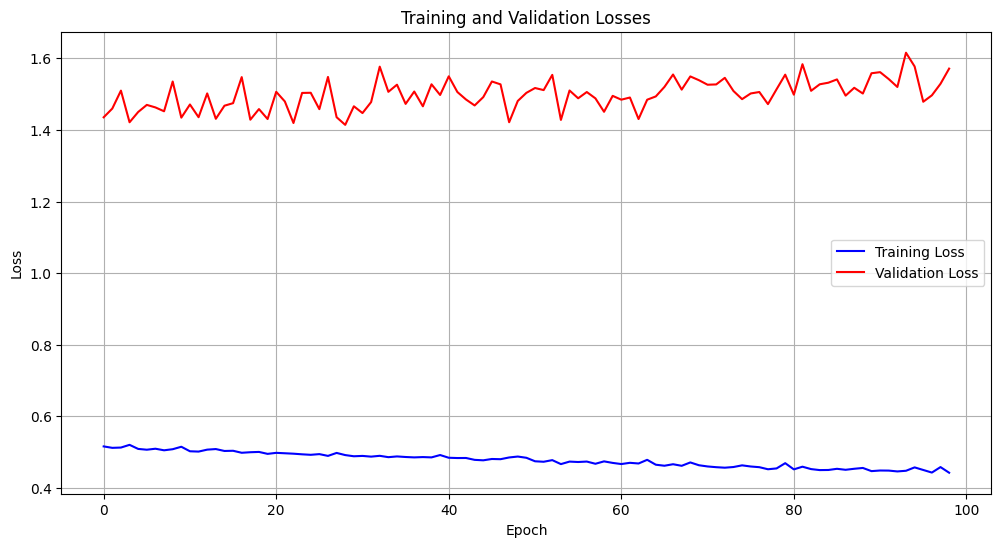

In [59]:
import matplotlib.pyplot as plt

# Plotting the training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses[1:], label='Training Loss', color='blue')
plt.plot(val_losses[1:], label='Validation Loss', color='red')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()